# Analyzing the impact of Emoticons on Sentiment in Amazon product reviews using Deep Learning techniques

#### In today's digital age, sentiment analysis has become increasingly important for businesses to understand customer opinions and feedback. Emoticons, in particular, can be a powerful indicator of sentiment in online text, as they provide additional contextual information about the writer's emotional state. However, the effect of emoticons on sentiment analysis is still not well understood, especially in the context of product reviews. In this Colab notebook, we aim to investigate the initial steps of data preparation of Amazon product reviews.

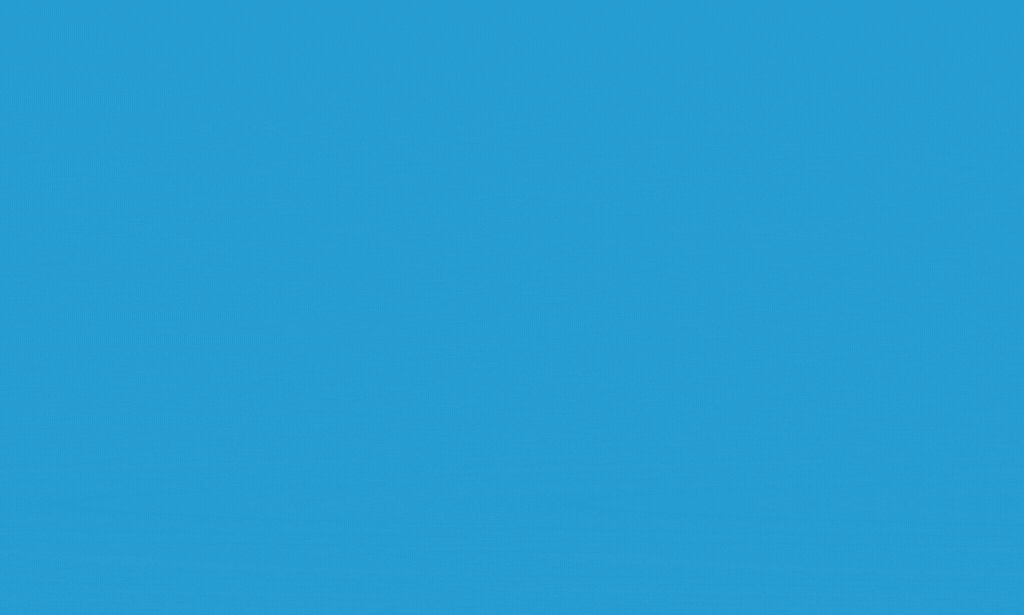



Data preparation is a crucial step in natural language processing
projects. During this phase, several important steps are implemented, including

**1. Data Collection**

**2. Data Preprocessing**

**3. Data Annotation**

**4. EDA**





---

# 1. Data Collection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Merging Amazon Review Datasets using Pandas

In this notebook, we will download two Amazon review datasets: Personal Care Appliances and Health & Personal Care. These datasets are in TSV format and stored in Amazon S3. We will use the `urllib` and `pandas` libraries to download and load the datasets into pandas dataframes, and then merge them into a single dataframe using pandas `concat()` function. Note that `error_bad_lines=False` is used to ignore any lines in the datasets that may contain errors.

The merged dataframe will contain all the rows from both datasets, which we can use for further analysis and modeling. Let's get started!


In [ ]:
import pandas as pd
import urllib.request

# download Personal Care Appliances dataset
url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz'
filename = 'amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz'
urllib.request.urlretrieve(url, filename)

# load Personal Care Appliances dataset into pandas dataframe
df1 = pd.read_csv(filename, sep='\t', error_bad_lines=False)

In [ ]:
# download Health & Personal Care dataset
url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Health_Personal_Care_v1_00.tsv.gz'
filename = 'amazon_reviews_us_Health_Personal_Care_v1_00.tsv.gz'
urllib.request.urlretrieve(url, filename)

# load Health & Personal Care dataset into pandas dataframe
df2 = pd.read_csv(filename, sep='\t', error_bad_lines=False)

In [ ]:
# download Beauty dataset
url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Beauty_v1_00.tsv.gz'
filename = 'amazon_reviews_us_Beauty_v1_00.tsv.gz'
urllib.request.urlretrieve(url, filename)

# load Beauty dataset into pandas dataframe
df3 = pd.read_csv(filename, sep='\t', error_bad_lines=False)

In [ ]:
# download Gifts dataset
url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz'
filename = 'amazon_reviews_us_Gift_Card_v1_00.tsv.gz'
urllib.request.urlretrieve(url, filename)

# load Gifts dataset into pandas dataframe
df4 = pd.read_csv(filename, sep='\t', error_bad_lines=False)

In [ ]:
# merge the two dataframes
df = pd.concat([df1, df2, df3, df4])

# Save the merged dataframe to a CSV file in Google Drive
output_path = "./merged_data.csv"
df.to_csv(output_path, index=False)

# print the merged dataframe
print(df)

       marketplace  customer_id       review_id  product_id  product_parent  \
0               US     32114233  R1QX6706ZWJ1P5  B00OYRW4UE       223980852   
1               US     18125776  R3QWMLJHIW6P37  B0000537JQ       819771537   
2               US     19917519  R14Z1VR1N0Z9G6  B00HXXO332       849307176   
3               US     18277171   R25ZRJL0GH0U0  B00EOB0JA2       700864740   
4               US      2593270  R3837KYH7AZNIY  B00OC2O1UC       794298839   
...            ...          ...             ...         ...             ...   
148305          US     40383801   R57O26VBSLMP1  B0002CZPPG       867256265   
148306          US     15124244  R375D634NGSSPI  B0002CZPPG       867256265   
148307          US     40383801  R2NCVKVC9B7I9C  B0002CZPPG       867256265   
148308          US     30603398   RC2BIM4XKDCY4  B0002CZPPG       867256265   
148309          US     16262996   RKOEI5NT6A7LL  B0002CZPPG       867256265   

                                            product

## 1.2 Feature Selection
* Importing Merged Dataset
* Selecting `Star Rating`,`Total Votes`, `Review Headline`, and `Review Body` as features
* Removing Null Values
* Checking Data Types and conversion

In [ ]:
import re
import pandas as pd
df = pd.read_csv('merged_data.csv', dtype={'product_category': 'str'}, low_memory = False)

# Select required features
df = df[['star_rating', 'total_votes', 'review_headline', 'review_body']]

# Remove missing values
df = df.dropna()

In [ ]:
# checking data type of each feature
df.dtypes

star_rating         object
total_votes        float64
review_headline     object
review_body         object
dtype: object

In [ ]:
#converting data type of star rating and total votes to int
df['star_rating'] = df['star_rating'].astype(float).astype(int)
df['total_votes'] = df['total_votes'].astype(int)
# rechecking data types
df.dtypes

star_rating         int32
total_votes         int32
review_headline    object
review_body        object
dtype: object

## 1.3 Selecting Emoji As Feature
This code first creates a new column called `emojis` by applying a `lambda` function to each review body that only keeps the characters that are emojis. Then, it filters the rows to only keep the ones where the `emojis` column has at least one character (i.e., at least one emoji). Finally, it selects the desired columns (`star_rating`, `total_votes`, `review_headline`, `review_body`, and `emojis`) and returns the filtered dataframe.


In [ ]:
# install the emoji module
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=1912b5f267094e89b55e2f02a4b63fcb3d913b4a71ce2b676e1806cfaecf39e2
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
import emoji

# create a new column to store the emojis
df['emojis'] = df['review_body'].apply(lambda x: ''.join(c for c in x if c in emoji.EMOJI_DATA))

# filter the rows with at least one emoji
df_with_emoji = df[df['emojis'].str.len() > 0][['star_rating', 'total_votes', 'review_headline', 'review_body', 'emojis']]

In [ ]:
df_with_emoji

,star_rating,total_votes,review_headline,review_body,emojis
96,5,1,The best! Taste great too,Absolutely love this! Can't live without it.. ...,😊
129,5,0,Best flavor of all I've tried,Wicked fast delivery! Best flavor of all I've ...,😉
553,5,0,Worth the Money,Just what I needed at a fair price. It works g...,👍
641,1,0,GARBAGE,It was fun to use for the first 2 hours but a ...,😠
888,5,0,Really works!,My friends comment how did I lose my belly tha...,😉
...,...,...,...,...,...
10608525,5,0,The Perfect Gift,I selected a 5 Star rating for this because it...,♥
10614288,5,0,Convenient!,This was a great way include a money card in m...,😀
10615623,5,0,Gift cards,Love giving them and getting for myself<br />H...,😃
10617344,5,0,Gift card,Super gift. Worked like a charm. Very happy😄Wo...,😄


## 1.4 Make A Single Review Feature
This code will first combine the `review_headline` and `review_body` columns into a new column named `full_review`. Then it will drop the `review_headline` column using the `drop()` method with `axis=1` parameter, which means to drop a column (as opposed to `axis=0` which would drop a row). The `inplace=True` parameter ensures that the original dataframe is modified rather than returning a copy.

In [ ]:
df_with_emoji['full_review'] = df_with_emoji['review_headline'] + ' ' + df_with_emoji['review_body']
df_with_emoji.drop('review_headline', axis=1, inplace=True)
# rearranging the order of features
df = df_with_emoji.reindex(columns=['full_review', 'emojis', 'star_rating', 'total_votes'])

In [ ]:
df

,full_review,emojis,star_rating,total_votes
96,The best! Taste great too Absolutely love this...,😊,5,1
129,Best flavor of all I've tried Wicked fast deli...,😉,5,0
553,Worth the Money Just what I needed at a fair p...,👍,5,0
641,GARBAGE It was fun to use for the first 2 hour...,😠,1,0
888,Really works! My friends comment how did I los...,😉,5,0
...,...,...,...,...
10608525,The Perfect Gift I selected a 5 Star rating fo...,♥,5,0
10614288,Convenient! This was a great way include a mon...,😀,5,0
10615623,Gift cards Love giving them and getting for my...,😃,5,0
10617344,Gift card Super gift. Worked like a charm. Ver...,😄,5,0


In [ ]:
output_path = "./Amazon_Reviews_Data.csv"
df.to_csv(output_path, index=False)

---

# 2. Data Preprocessing

## 2.1. Text Cleaning
Before we start using the reviews’ text we need to clean it. We’ll do the this in the class `CleanText`. With this class we’ll perform the following actions:

* remove the mentions
* remove the hash tag sign `(#)` but not the actual tag as this may contain information
* set all words to lowercase
* remove all punctuations, including the question and exclamation marks
* remove the URLs as they do not contain useful information.
* make sure to convert the emojis into one word.
* remove digits
* remove stopwords
* apply the PorterStemmer to keep the stem of the words


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
import re
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin

import spacy
nlp = spacy.load('en_core_web_sm')

class CleanText(BaseEstimator, TransformerMixin):
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)

    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?<br>', '', input_text)

    #def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        #return input_text.replace('_','')

    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)
    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)

    def to_lower(self, input_text):
        return input_text.lower()

    def remove_br(self, input_text):
      return re.sub('br', '', input_text)

    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        # whitelist = ["n't", "not", "no"]
        words = input_text.split()
        clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 1]
        return " ".join(clean_words)



    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_br).apply(self.remove_stopwords)
        return clean_X


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# reading extracted data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Amazon_Reviews_Data.csv')

In [ ]:
df

,full_review,emojis,star_rating,total_votes
0,best tast great absolut love live without give...,😊,5,1
1,best flavor tri wick fast deliveri best flavor...,😉,5,0
2,worth money need fair price work great face ma...,👍,5,0
3,garbag fun use first hour peic fell realli use...,😠,1,0
4,realli work friend comment lose belli fast giv...,😉,5,0
...,...,...,...,...
26813,perfect gift select star rate perfect onlin gi...,♥,5,0
26814,conveni great way includ money card grandson c...,😀,5,0
26815,gift card love give get help keep budget:grinn...,😃,5,0
26816,gift card super gift work like charm happy:gri...,😄,5,0


In [ ]:
#checking null values
df.dropna()
df.isnull().sum()

full_review    0
emojis         0
star_rating    0
total_votes    0
dtype: int64

In [ ]:
df['full_review'] = df['full_review'].astype(str)
df.dtypes

full_review    object
emojis         object
star_rating     int64
total_votes     int64
dtype: object

## 2.2. Emojis Replacement
Replacing the emojis in `full_review` with their textual representation by using `emoji` module.

In [ ]:
import emoji
def replace_emojis(text):
    return emoji.demojize(text)

df['full_review'] = df['full_review'].apply(replace_emojis)

In [ ]:
# define a function to remove emojis using the emoji module
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# apply the remove_emoji function to the full_review column
df['full_review'] = df['full_review'].apply(remove_emoji)

In [ ]:
# Count the number of reviews that contain emojis
num_reviews_with_emoji = sum(df['full_review'].apply(lambda x: any(char in emoji.EMOJI_DATA for char in x)))

# Print the count
print(f"There are {num_reviews_with_emoji} reviews with emojis in the text column.")


There are 0 reviews with emojis in the text column.


In [ ]:
#To show how the cleaned text variable will look like, here’s a sample.
ct = CleanText()
df['full_review'] = ct.fit_transform(df.full_review)

In [ ]:
df

,full_review,emojis,star_rating,total_votes
0,best tast great absolut love live without give...,😊,5,1
1,best flavor tri wick fast deliveri best flavor...,😉,5,0
2,worth money need fair price work great face ma...,👍,5,0
3,garbag fun use first hour peic fell realli use...,😠,1,0
4,realli work friend comment lose belli fast giv...,😉,5,0
...,...,...,...,...
26813,perfect gift select star rate perfect onlin gi...,♥,5,0
26814,conveni great way includ money card grandson c...,😀,5,0
26815,gift card love give get help keep budget grinn...,😃,5,0
26816,gift card super gift work like charm happy gri...,😄,5,0


----

# 3. Data Annotation
In this code, we define a function `assign_label()` which takes a `star_rating` value and returns a `label` based on the conditionals. We then use the `apply()` method on the `star_rating` column of the DataFrame to apply this function to each row and create a new column `label` in the DataFrame with the assigned labels.


## 3.1. Polarity Score Based

In [ ]:
from textblob import TextBlob

# Define a function to label the data using TextBlob sentiment analysis
def label_text(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity <= -0.6:
        return 'Side Effect'
    elif polarity > -0.6 and polarity <= -0.2:
        return 'Dissatisfaction'
    if polarity > -0.2 and polarity <= 0.2:
        return 'Uncertain'
    elif polarity > 0.2 and polarity <= 0.6:
        return 'Satisfication'
    else:
        return 'Efficacy'

# Add a new column to the dataframe with the predicted labels
df['Polarity Label'] = df['full_review'].apply(label_text)

# Save the labeled dataframe to a CSV file
#df.to_csv('labeled_data.csv', index=False)


In [ ]:
label_counts = df['Polarity Label'].value_counts()
print(label_counts)

Satisfication      11792
Uncertain          11293
Efficacy            3009
Dissatisfaction      566
Side Effect          158
Name: Polarity Label, dtype: int64


## 3.2. Active Learning Based Labels
This section demonstrates how to use active learning to perform data annotation for sentiment analysis on Amazon product reviews. The goal is to predict the sentiment of each review among five classes: `efficacy`, `satisfaction`, `uncertain`, `dissatisfaction`, and `side effect`.

We tried different classifier model with TF-IDF vectorization to perform sentiment analysis. Since the dataset has no labels, we will use active learning to select the most informative data points to be labeled without manual annotation. We will start by training the model on a small labeled subset of the data, and then iteratively select the most uncertain data points to be labeled using the model's predicted probabilities.

Following are sub-sections:


* Splitting the dataset into training and test sets
* Training a on different classifier models on the labeled training set
* Evaluating the performance of the model on the test set
* Using active learning to select the most informative data points to  be labeled
* Labeling the selected data points using the model's predicted probabilities and adding them to the training set
* Retraining the model on the updated labeled training set and repeating steps 4-6 until the model's performance reaches a satisfactory level
* Using the trained model to predict the labels for the remaining unlabeled data


### 3.2.1. Split the dataset into two parts: a training set and a test set. Use the `star_rating` column as the labels for the training set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['full_review'], df['star_rating'], test_size=0.2, random_state=42)

### 3.2.2. Train a model on the labeled training set. We tried different machine learning classifier models, and selected which has highest accuracy:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

"""

Hyperparameters:


1. Random Forest Classifier
n_estimators is the number of trees in the forest,
and max_depth is the maximum depth of the tree. random_state is an integer that is used to seed the random number generator.

2. Gradient Boosting Classifier
n_estimators is the number of boosting stages to perform. learning_rate is the step size shrinkage used to prevent overfitting.
max_depth is the maximum depth of each individual estimator. random_state is an integer that is used to seed the random number generator.

"""

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=16000)
#model = RandomForestClassifier(n_estimators=16000, max_depth=None, random_state=42)
#model = GradientBoostingClassifier(n_estimators=16000, learning_rate=0.01, max_depth=5, random_state=42)

# Training
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=16000)

### 3.2.3. Use the trained model to predict the labels for the test set:


In [ ]:
X_test_vec = vectorizer.transform(X_test)
y_pred = model.predict(X_test_vec)

### 3.2.4. Evaluate the performance of the model on the test set using metrics such as accuracy, precision, recall, and F1-score:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8288590604026845
Precision: 0.8190380120664946
Recall: 0.8288590604026845
F1-score: 0.8023454058747382


### 3.2.5. Use active learning to select the most informative data points to be labeled. You can use a uncertainty sampling strategy to select the data points that the model is most uncertain about:

In [ ]:
import numpy as np

# Calculate the uncertainty scores for each data point in the test set
X_test_vec = vectorizer.transform(X_test)
probs = model.predict_proba(X_test_vec)
uncertainty = np.max(probs, axis=1)

# Select the top 1000 data points with the highest uncertainty scores
indices = np.argsort(uncertainty)[-1000:]
X_uncertain = X_test.iloc[indices]

### 3.2.6. Use the trained model to predict the labels for the df dataset:

In [ ]:
X_vec = vectorizer.transform(df['full_review'])
df['Active Labels'] = model.predict(X_vec)

In [ ]:
# Map predicted labels to sentiment categories
sentiment_map = {
    5: "Efficacy",
    4: "Satisfication",
    3: "Uncertain",
    2: "Dissatisfaction",
    1: "Side Effect"
}

# Check if the 'predicated_label' column exists in the DataFrame
if 'Active Labels' in df.columns:
    # Replace predicted labels with sentiment categories
    df['Active Labels'] = df['Active Labels'].map(sentiment_map)
else:
    print("No 'predicated_label' column found in the DataFrame.")


In [ ]:
label_counts = df['Active Labels'].value_counts()
print(label_counts)

Efficacy           22291
Side Effect         2210
Satisfication       1681
Uncertain            426
Dissatisfaction      210
Name: Active Labels, dtype: int64


## 3.3. Emoji Based Label

In [ ]:
Efficacy = ['🌵', '🙌', '😍', '🔝', '🌞', '👪', '😇','⭐', '😴', '💊', '🍒', '😻', '🐾', '📭', '🚗',
            '😊', '🍊', '⛄', '👮',  '😉', '♥', '❤', '💘','💟','✌', '♥', '💯',  '👊', '💎', '🌷', '✅',
            '❤', '🔥', '❣', '💓',  '😘', '💗',  '💙', '🍁', '🌸', '😻', '💖', '💛',   '🌹', '💕', '💝',
            '💞','💜','💚', '👍' , '❤', '❤','❤', '❤', '❤','😍', '😊', '😃'
            '💫','🐧','💡','💨','↖','💉','〰','😗','🚚','📑','🍱','☮']

Satisfication = ['🙌', '💌', '😍', '👯', '👀', '🙂', '😉','🙇', '💫', '🌹', '🎶', '🌸',  '😎', '👌', '💙',
                 '😀', '😸',  '👍', '😃', '😄', '♠', '🍺','🙋', '😃', '🚻', '🖐', '🆗','✋', '🍸', '🙏',
                 '💄', '🎵', '🌼', '👍', '🏆' , '🌿','✔', '🔋', '💪',  '👆', '😀', '👌', '😋', '😅', '⚡',
                 '👒', '😂','☑', '👈', '🎁',  '🙅', '👋', '⛄', '😊',  '🎯', '🍻', '👇', '⭐', '👐', '☝',
                 '🙈',  '😜', '💡', '😝',  '🤔','😇', '💲',  '🍦','💏', '🌻', '🤗', '👣', '👀', '🌝', '✨',
                 '📦', '👄', '💪','💋', '👍','☺' ,'⭐', '👍', '❤','👏', '😊','😍', '😊', '😃','👍' ,'😊',
                 '👍',  '👌','💡','👢','🍹','🐧','💡','🍺','🌈', '🤑','💆','🐥','📺','🎄','🐻','💏', '🎊',
                 '🎎','🌠','🍷','🍪','💇', '🐟','🎀','👮','🌴','💐','🌺','💵','🍌','👾','🙀','🏽','👏','❣',
                 '🎓','🐅','🙉','⏰','✴','📎','☀','💦','🍉','🐒', '💈','🎏','⏏','💰','🐩','🎉','🌙','📚',
                 '✈','🏄','😮','😷','🌜','👦','🎵','📡','🔯','🌾','👨','🎈','👛','👙','🔫','💸','💁','💠',
                 '👟','👃','🍑','🚀','🎬', '®','🎻','👽','😱','🎤','😽','😚', '🍅','🌊','🚬','™','🎽','♋',
                 '🐂','🎼','👝','🅾','👉','👭','💤', '🐶','🍊','💍','👧','😁','👤','👱','👠','⤵','🌼','🆒',
                 '👄','🕐','▶','🔱','💅','🍭','🎋','🚚','🍋','🙃','👸','💶','🐝','🐎','🌟', '💣','🌛','✂',
                 '🏯','👡','👓','♀','👣','💄','✊','🏨','🔝','🎥','💻','💒','🍆','🍫','🍼','🍌','👻','🍺',
                 '🌄','🐓','💧','🍏', '🍍', '🐴','💊','🍒','💢','👗','🤔','®™','®™®','👚','🐥','🔮','🌃',
                 '📘','🌀','🍷','🚿','🍂','🐴']

Uncertain = ['▪', '🙍','🐇', '😐', '🍝', '👺', '👻', '‼', '➿', '😮', '💃','🍶', '🎎', '🔱', '🔸', '🍨', '🚩', '🐈', '❓', '🐜', '♓', '📹', '🐩', '🍍', '🐕', '🚶', '🍲', '🍹', '🎅', '🙊', '🍵', '🃏', '🔛', '⏏',
             '🐠', '👭', '🆚','🐥', '👵', '♦', '🐰', '🙎', '🍼', '⬅', '🐴', '🙀',  '📘', '🔩', '🐱', '➰',
                 '🎫', '🏼','👪', '⚱', '⛵', '🔗', '🌠', '➕', '🏃', '➡',
                  '🐘', '🎊', '🍯', '🍭',  '🔨', '🛁', '➖', '🚽', '🚗', '🐄', '📭', '🏾', '🐭',
                  '🍱', '☁', '🐯', '🚿', '🏽',  '↖', '⚠', '🎂', '🎶','🍴', '♻', '♂',  '👴','🍬', '©',  '🎆', '🏻', '📺', '💇', '👼', '🐳', '🍗', '↗', '🚼',
                   '🗽', '🍀', '⚓', '🌍', '🍷', '🎑', '📮', '🌅', '💆', '👫', '💺', '🐷', '📑', '◾', '⁉','🎭', '♨', '🍃', '👞', '😿',
                 '👑' , '▶', '🎇','🗼', '♣', '⬇', '🎢', '✏', '🌌', '🐸', '🔹','📱', '🙇',
                  '🌎', '◀', '🍰', '🍧', '⛪', '🙍', '㊙', '🐚', '🛀', '🐼', '🐇', '👯', '🎄', '🅰', '📉',
                 '📍', '🏠', '🚢' , '🐻', '💳','🏿', '💒', '🙆','⁉']

Dissatisfaction = ['😾', '😞', '😔', '😪', '😕', '😦', '😟', '😰','😒', '😬', '😈', '📚', '❕', '😠', '😣','😤' , '🤣','😚','😶','🌛','😵',
                       '🕗', '😙', '😫', '😛', '😺', '😹', '😧', '☺', '🤓', '📎','😉','😗',   '😆', '🍥', '😨', '😳', '😸', '🐾',
                     '😐',  '😲','😴', '😯','🙆', '😌', '🕖', '🌞',  '☹', '🤑', '👶', '🙄', '😄', '😩', '😏', '👎', '☠',  '😞', '😔' ,
                    '💥',  '👰','😑',  '😭', '👎','👎', '👎', '👎', '👎', '😁', '👎', '👎', '😫','🎭','♠','⚠','😼','🚺','🐧','😑']

SideEffect =  [  '💩', '🤡', '🐸', '😼', '🐻', '🐭', '🌚','😡','😡','😖', '👾','👅', '👩', '🍪', '✊','🤢', '😠', '😭',
                     '💔','😥' , '🐞','✖', '😱', '❎', '👿','😒', '😣', '😓',  '⛔','😡','😬', '😈', '💀', '👜',  '😢', '❌', '💩', '😨', '😖'
                     , '😡', '😡', '😡','😭' '👀','🐜','❗','💭','👺','🚨','🚫']

# Define a function to check if any emoji in a given list is present in a text string
def check_emoji(emojis_list, emoji_list):
    for emoji in emojis_list:
        if emoji in emoji_list:
            return True
    return False

# Define a function to apply the label to each row of the dataframe
def label_row(row):
    emojis_list = row['emojis']
    if check_emoji(emojis_list, Efficacy):
        return 'Efficacy'
    elif check_emoji(emojis_list,Satisfication):
        return 'Satisfication'
    elif check_emoji(emojis_list, Dissatisfaction):
        return 'Dissatisfaction'
    elif check_emoji(emojis_list, Uncertain):
        return 'Uncertain'
    elif check_emoji(emojis_list, SideEffect):
        return 'Side Effect'
    else:
        return None

# Apply the label to each row of the dataframe using the label_row function
df['Emoji Label'] = df.apply(label_row, axis=1)


In [ ]:
label_counts = df['Emoji Label'].value_counts()
print(label_counts)

Efficacy           13118
Satisfication       9798
Dissatisfaction     3006
Side Effect          563
Uncertain            333
Name: Emoji Label, dtype: int64


## 3.4. Combination Method For Final Label
The given code implements a voting-based approach to determine the final label for each row in a pandas DataFrame. It does this by iterating over each row and considering the values in three columns: "Polarity Label", "Active Labels", and "Emoji Label". These values are treated as labels, and their occurrences are counted for the current row. The label with the highest count is then chosen as the final label for that row, and it is assigned to the "Labels" column using the **`df.at[index, 'Labels']`** method. However, if there is a tie in the voting, the code applies a tie-breaking rule to choose between the tied labels. In this rule, the code prioritizes the emoji label, followed by the active label, and finally the polarity label. The final label is then assigned to a new column named 'Labels' in the DataFrame.

The voting-based approach is a common technique used to make decisions based on multiple inputs or opinions. In this case, it is applied to determine the final label for each row in the DataFrame. The approach can be used when there are multiple ways to categorize or label data, and each approach is equally valid. By considering multiple labels and choosing the one with the highest count, the approach increases the accuracy and reliability of the final labels.


In [ ]:
# Create a new column for the final label
df['Labels'] = ''

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Get the values of each label for the current row
    labels = [row['Polarity Label'], row['Active Labels'], row['Emoji Label']]

    # Count the number of occurrences of each label
    label_counts = {}
    for label in labels:
        if label not in label_counts:
            label_counts[label] = 0
        label_counts[label] += 1

    # Check for a tie in the voting
    max_count = max(label_counts.values())
    tied_labels = [label for label, count in label_counts.items() if count == max_count]

    # Apply tie-breaking rule if there is a tie
    if len(tied_labels) > 1:
        if 'Emoji Label' in tied_labels:
            final_label = row['Emoji Label']
        elif 'Active Labels' in tied_labels:
            final_label = row['Active Labels']
        else:
            final_label = row['Polarity Label']
    else:
        # Choose the label with the highest count as the final label
        final_label = max(label_counts, key=label_counts.get)

    # Assign the final label to the 'Labels' column
    df.at[index, 'Labels'] = final_label


In [ ]:
df

,full_review,emojis,star_rating,total_votes,Polarity Label,Active Labels,Emoji Label,Labels
0,best tast great absolut love live without give...,😊,5,1,Efficacy,Efficacy,Efficacy,Efficacy
1,best flavor tri wick fast deliveri best flavor...,😉,5,0,Efficacy,Efficacy,Efficacy,Efficacy
2,worth money need fair price work great face ma...,👍,5,0,Satisfication,Efficacy,Efficacy,Efficacy
3,garbag fun use first hour peic fell realli use...,😠,1,0,Satisfication,Side Effect,Dissatisfaction,Satisfication
4,realli work friend comment lose belli fast giv...,😉,5,0,Uncertain,Efficacy,Efficacy,Efficacy
...,...,...,...,...,...,...,...,...
26813,perfect gift select star rate perfect onlin gi...,♥,5,0,Efficacy,Efficacy,Efficacy,Efficacy
26814,conveni great way includ money card grandson c...,😀,5,0,Satisfication,Efficacy,Satisfication,Satisfication
26815,gift card love give get help keep budget grinn...,😃,5,0,Satisfication,Efficacy,Satisfication,Satisfication
26816,gift card super gift work like charm happy gri...,😄,5,0,Satisfication,Efficacy,Satisfication,Satisfication


In [ ]:
label_count = df['Labels'].value_counts()
print(label_count)

Efficacy           13412
Satisfication       6339
Uncertain           6066
Dissatisfaction      545
Side Effect          456
Name: Labels, dtype: int64


In [ ]:
df

,full_review,emojis,star_rating,total_votes,Labels
0,best tast great absolut love live without give...,😊,5,1,Efficacy
1,best flavor tri wick fast deliveri best flavor...,😉,5,0,Efficacy
2,worth money need fair price work great face ma...,👍,5,0,Efficacy
3,garbag fun use first hour peic fell realli use...,😠,1,0,Satisfication
4,realli work friend comment lose belli fast giv...,😉,5,0,Efficacy
...,...,...,...,...,...
26813,perfect gift select star rate perfect onlin gi...,♥,5,0,Efficacy
26814,conveni great way includ money card grandson c...,😀,5,0,Satisfication
26815,gift card love give get help keep budget grinn...,😃,5,0,Satisfication
26816,gift card super gift work like charm happy gri...,😄,5,0,Satisfication


----

# 4. Exploratary Data Analysis

In [ ]:
# reading labeled data
df = pd.read_csv('/content/drive/MyDrive/Amazon_Final_Labeled_Data.csv')

## 4.1. Numerical Features Analysis

### 4.1.1 Check the data types and size of the dataset:

In [ ]:
# Check data types and size of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26818 entries, 0 to 26817
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_review  26804 non-null  object
 1   emojis       26818 non-null  object
 2   star_rating  26818 non-null  int64 
 3   total_votes  26818 non-null  int64 
 4   Labels       26818 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


### 4.1.2. Check for missing values:

In [ ]:
# Check for missing values
print(df.isnull().sum())

full_review    14
emojis          0
star_rating     0
total_votes     0
Labels          0
dtype: int64


In [ ]:
df.dropna()

,full_review,emojis,star_rating,total_votes,Labels
0,best tast great absolut love live without give...,😊,5,1,Efficacy
1,best flavor tri wick fast deliveri best flavor...,😉,5,0,Efficacy
2,worth money need fair price work great face ma...,👍,5,0,Efficacy
3,garbag fun use first hour peic fell realli use...,😠,1,0,Satisfication
4,realli work friend comment lose belli fast giv...,😉,5,0,Efficacy
...,...,...,...,...,...
26813,perfect gift select star rate perfect onlin gi...,♥,5,0,Efficacy
26814,conveni great way includ money card grandson c...,😀,5,0,Satisfication
26815,gift card love give get help keep budget grinn...,😃,5,0,Satisfication
26816,gift card super gift work like charm happy gri...,😄,5,0,Satisfication


### 4.1.3. Analyze the distribution of star ratings

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = ['#4C72B0', '#C44E52', '#55A868', '#8172B2', '#CCB974', '#64B5CD']


# Set the Seaborn style and custom color palette
#sns.set()

# Apply the custom color palette to all Seaborn plots
sns.color_palette(custom_palette)

# Set the default figure size
plt.figure(figsize=(8, 6))

# Set the default figure size for all Seaborn plots
sns.set(rc={'figure.figsize':(8, 6)}, style='whitegrid', palette=custom_palette)

<Figure size 576x432 with 0 Axes>

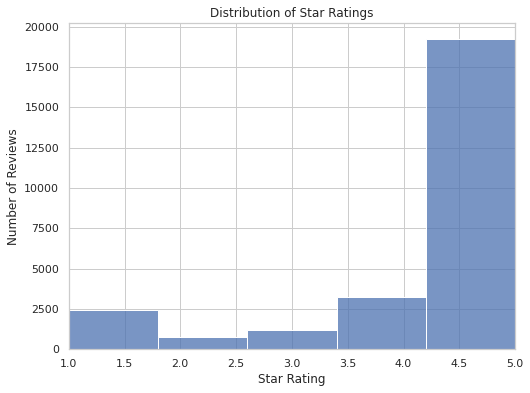

In [ ]:
# Count the number of reviews for each star rating
rating_counts = df['star_rating'].value_counts()

# Plot a histogram of the star ratings
sns.histplot(data=df, x='star_rating', bins=5)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xlim(1, 5)
plt.show()

### 4.1.4. Analyze the distribution of labels:

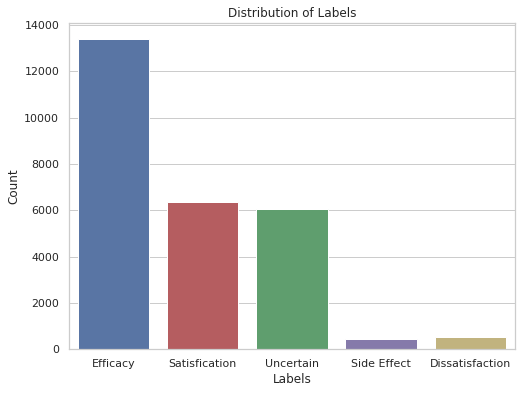

In [ ]:
sns.countplot(data=df, x='Labels')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

### 4.1.5. Analyze the distribution of total votes:

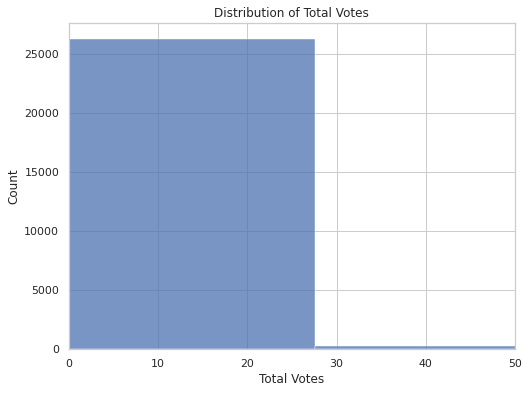

In [ ]:
sns.histplot(data=df, x='total_votes', bins=100)
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Count')
plt.xlim(0, 50)
plt.show()

### 4.1.6. Explore the relationship between star rating and total votes:

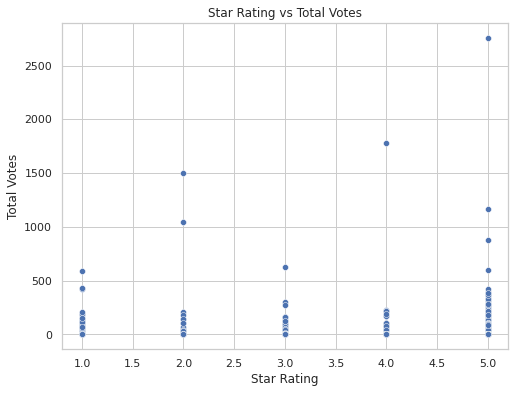

In [ ]:
sns.scatterplot(data=df, x='star_rating', y='total_votes')
plt.title('Star Rating vs Total Votes')
plt.xlabel('Star Rating')
plt.ylabel('Total Votes')
plt.show()

## 4.2. Categorical Feature Analysis

### 4.2.1. Distribution of Review Length

In [ ]:
df['full_review'] = df['full_review'].astype(str)
df['review_length'] = df['full_review'].apply(len)

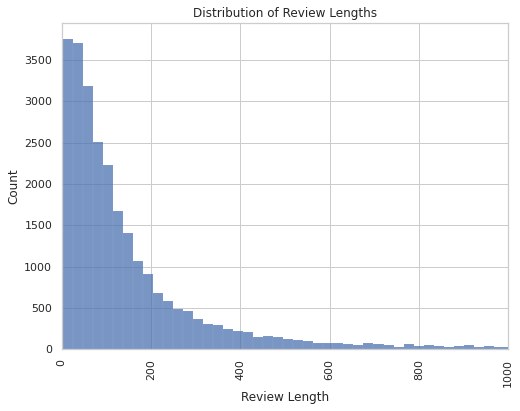

In [ ]:
sns.histplot(df['review_length'], kde=False, bins=1000)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.xlim(0, 1000)
plt.show()

### 4.2.2. Word Cloud

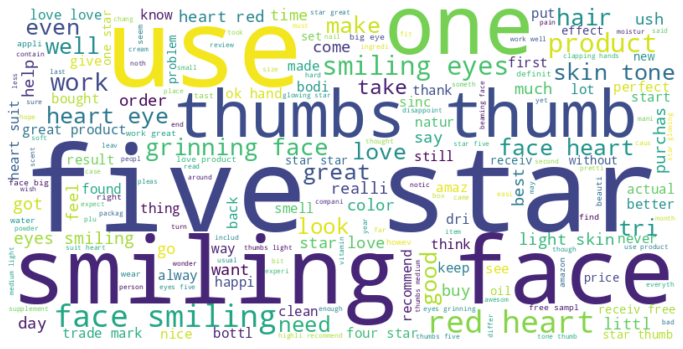

In [ ]:
from wordcloud import WordCloud

# Convert any non-string values in the 'full_review' column to strings
df['full_review'] = df['full_review'].astype(str)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['full_review'].tolist()))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 4.2.3. Distribution of the Sentiment Polarity Scores

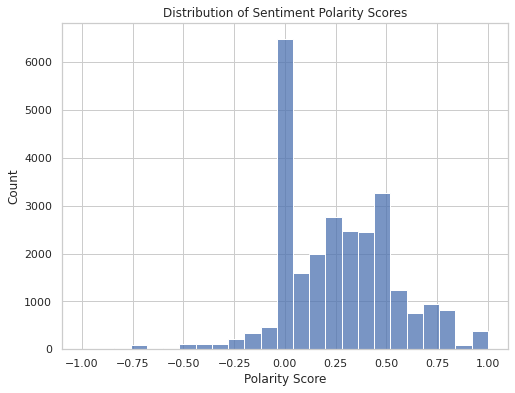

In [ ]:
from textblob import TextBlob

# Create a new column for sentiment polarity scores
df['polarity_score'] = df['full_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot a histogram of the sentiment polarity scores
sns.histplot(df['polarity_score'], kde=False, bins=25)
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.show()

### 4.2.4. Distribution of Common Words Occurences

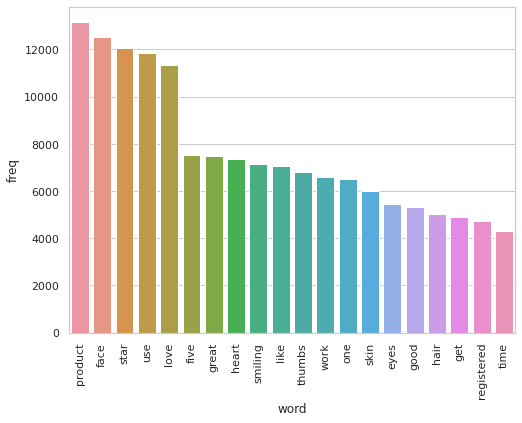

In [ ]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bow = cv.fit_transform(df['full_review'])
word_freq = dict(zip(cv.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
sns.barplot(x="word", y="freq", data=word_counter_df)
plt.xticks(rotation=90)
plt.show()

## End Of Notebook

---


## 😊